In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('/Users/taraapple/Desktop/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


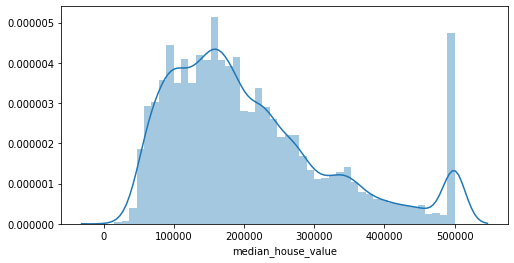

In [11]:
plt.figure(figsize=(8,4))
sns.distplot(df['median_house_value'])

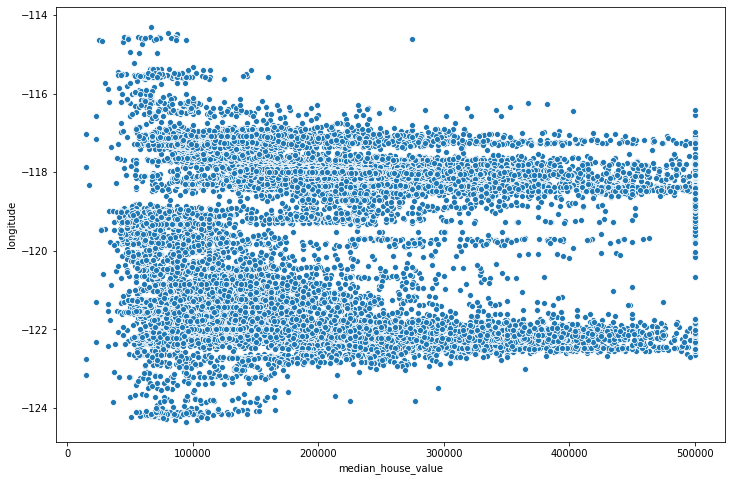

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='median_house_value',y='longitude',data=df)

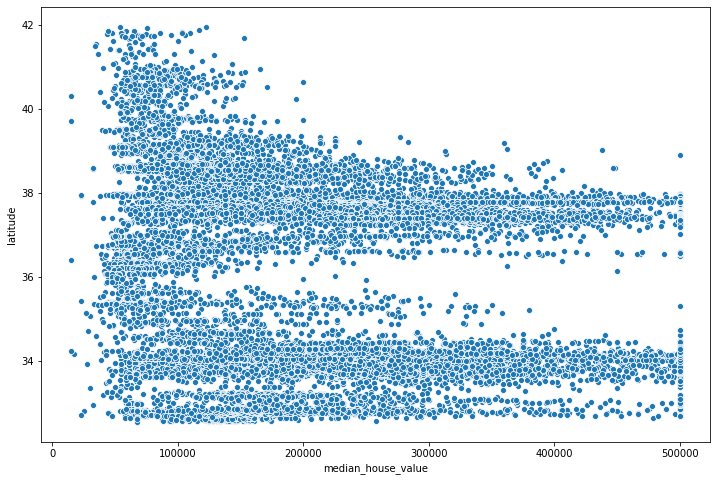

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='median_house_value',y='latitude',data=df)

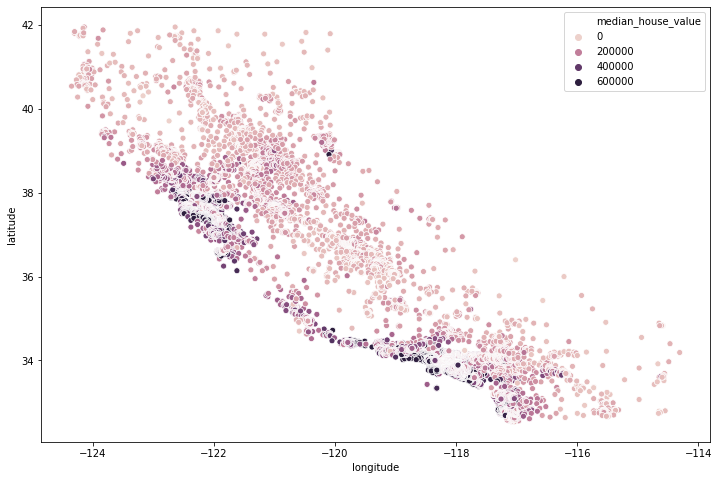

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='longitude',y='latitude',data=df,hue='median_house_value')

In [15]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


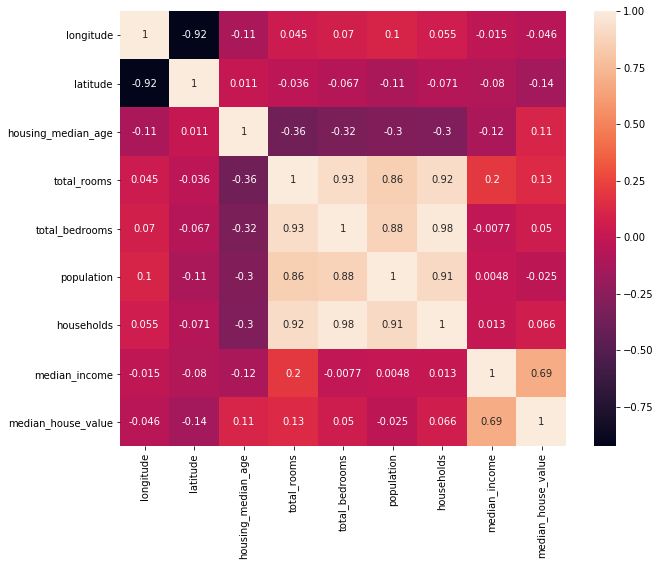

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [28]:
df.dropna(inplace=True)

In [29]:
X = df.drop('median_house_value',axis=1)
y = df['median_house_value']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [32]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400, callbacks=[early_stop])

Epoch 1/400
112/112 [==============================] - 0s 2ms/step - loss: 56287879168.0000 - val_loss: 55719170048.0000
Epoch 2/400
112/112 [==============================] - 0s 889us/step - loss: 56286961664.0000 - val_loss: 55717724160.0000
Epoch 3/400
112/112 [==============================] - 0s 827us/step - loss: 56284741632.0000 - val_loss: 55714512896.0000
Epoch 4/400
112/112 [==============================] - 0s 820us/step - loss: 56279986176.0000 - val_loss: 55708000256.0000
Epoch 5/400
112/112 [==============================] - 0s 781us/step - loss: 56271450112.0000 - val_loss: 55696908288.0000
Epoch 6/400
112/112 [==============================] - 0s 791us/step - loss: 56257724416.0000 - val_loss: 55680401408.0000
Epoch 7/400
112/112 [==============================] - 0s 791us/step - loss: 56237764608.0000 - val_loss: 55657578496.0000
Epoch 8/400
112/112 [==============================] - 0s 798us/step - loss: 56210907136.0000 - val_loss: 55627747328.0000
Epoch 9/400
112/11

112/112 [==============================] - 0s 792us/step - loss: 34693394432.0000 - val_loss: 31496689664.0000
Epoch 68/400
112/112 [==============================] - 0s 790us/step - loss: 34085939200.0000 - val_loss: 30884796416.0000
Epoch 69/400
112/112 [==============================] - 0s 892us/step - loss: 33802115072.0000 - val_loss: 30279757824.0000
Epoch 70/400
112/112 [==============================] - 0s 804us/step - loss: 33355159552.0000 - val_loss: 29681887232.0000
Epoch 71/400
112/112 [==============================] - 0s 851us/step - loss: 32914941952.0000 - val_loss: 29090056192.0000
Epoch 72/400
112/112 [==============================] - 0s 818us/step - loss: 32531927040.0000 - val_loss: 28507539456.0000
Epoch 73/400
112/112 [==============================] - 0s 804us/step - loss: 32032382976.0000 - val_loss: 27937622016.0000
Epoch 74/400
112/112 [==============================] - 0s 836us/step - loss: 31757555712.0000 - val_loss: 27366772736.0000
Epoch 75/400
112/112 

Epoch 133/400
112/112 [==============================] - 0s 834us/step - loss: 26719518720.0000 - val_loss: 16910612480.0000
Epoch 134/400
112/112 [==============================] - 0s 819us/step - loss: 27171876864.0000 - val_loss: 16862098432.0000
Epoch 135/400
112/112 [==============================] - 0s 825us/step - loss: 26884190208.0000 - val_loss: 16847239168.0000
Epoch 136/400
112/112 [==============================] - 0s 829us/step - loss: 26364813312.0000 - val_loss: 16803740672.0000
Epoch 137/400
112/112 [==============================] - 0s 811us/step - loss: 27160334336.0000 - val_loss: 16814774272.0000
Epoch 138/400
112/112 [==============================] - 0s 777us/step - loss: 27209283584.0000 - val_loss: 16821534720.0000
Epoch 139/400
112/112 [==============================] - 0s 757us/step - loss: 26807703552.0000 - val_loss: 16809053184.0000
Epoch 140/400
112/112 [==============================] - 0s 795us/step - loss: 27643983872.0000 - val_loss: 16851495936.0000


112/112 [==============================] - 0s 816us/step - loss: 26382706688.0000 - val_loss: 16288065536.0000
Epoch 199/400
112/112 [==============================] - 0s 800us/step - loss: 26761314304.0000 - val_loss: 16325424128.0000
Epoch 200/400
112/112 [==============================] - 0s 787us/step - loss: 26496702464.0000 - val_loss: 16291697664.0000
Epoch 201/400
112/112 [==============================] - 0s 795us/step - loss: 26108616704.0000 - val_loss: 16212312064.0000
Epoch 202/400
112/112 [==============================] - 0s 787us/step - loss: 26081470464.0000 - val_loss: 16210556928.0000
Epoch 203/400
112/112 [==============================] - 0s 805us/step - loss: 26587578368.0000 - val_loss: 16204744704.0000
Epoch 204/400
112/112 [==============================] - 0s 804us/step - loss: 26004246528.0000 - val_loss: 16194619392.0000
Epoch 205/400
112/112 [==============================] - 0s 798us/step - loss: 26524338176.0000 - val_loss: 16173674496.0000
Epoch 206/400


112/112 [==============================] - 0s 795us/step - loss: 26238529536.0000 - val_loss: 15540944896.0000
Epoch 264/400
112/112 [==============================] - 0s 806us/step - loss: 26155732992.0000 - val_loss: 15567366144.0000
Epoch 265/400
112/112 [==============================] - 0s 803us/step - loss: 25780293632.0000 - val_loss: 15541827584.0000
Epoch 266/400
112/112 [==============================] - 0s 814us/step - loss: 25878185984.0000 - val_loss: 15571351552.0000
Epoch 267/400
112/112 [==============================] - 0s 808us/step - loss: 25801646080.0000 - val_loss: 15556453376.0000
Epoch 268/400
112/112 [==============================] - 0s 808us/step - loss: 25928343552.0000 - val_loss: 15554437120.0000
Epoch 269/400
112/112 [==============================] - 0s 782us/step - loss: 25496584192.0000 - val_loss: 15530987520.0000
Epoch 270/400
112/112 [==============================] - 0s 781us/step - loss: 25860653056.0000 - val_loss: 15451571200.0000
Epoch 271/400


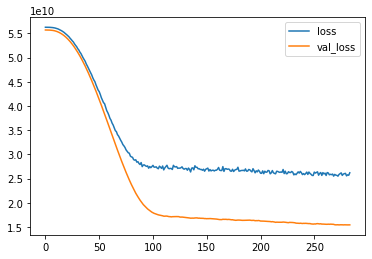

In [33]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_test,predictions))

print('square root of MSE:',np.sqrt(mean_squared_error(y_test,predictions)))


mean absolute error: 88568.68683982463
square root of MSE: 124189.05359757677


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.4 MB
Epoch 1/30
516/516 - 0s - loss: 0.3350 - val_loss: 0.2819
Epoch 2/30
516/516 - 0s - loss: 0.2714 - val_loss: 0.2795
Epoch 3/30
516/516 - 0s - loss: 0.2583 - val_loss: 0.2514
Epoch 4/30
516/516 - 0s - loss: 0.2491 - val_loss: 0.2462
Epoch 5/30
516/516 - 0s - loss: 0.2438 - val_loss: 0.2460
Epoch 6/30
51

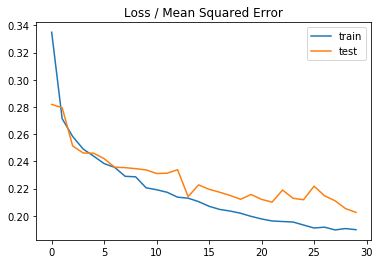

Root Mean Squared Error is 0.4499855123697767


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: UserWarning: color argument of Icon should be one of: {'green', 'gray', 'black', 'cadetblue', 'darkred', 'purple', 'orange', 'lightgray', 'lightred', 'darkpurple', 'beige', 'lightgreen', 'darkblue', 'lightblue', 'white', 'darkgreen', 'blue', 'red', 'pink'}.


None


In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
import matplotlib.pyplot as plt
from sklearn import metrics,preprocessing
import folium
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as pyplot
import os

df = pd.read_csv("/Users/taraapple/Desktop/housing.csv")
df.head()
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df['ocean_proximity']=number.fit_transform(df['ocean_proximity'].astype('str'))
data = df.columns
predictors = df[data[data != 'median_house_value']]
target = df['median_house_value']
predictors.fillna(predictors.mean(), inplace=True)
predictors.info()
predictors.describe()

from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.20)

x_norm = (predictors-predictors.mean())/predictors.std()
y_norm = (target-target.mean())/target.std()

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_norm,y_norm,test_size=0.20,random_state=0)
n_cols = x_train.shape[1]

def my_model():
    model = Sequential()
    model.add(Dense(100,activation='relu',input_shape=(n_cols,)))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

model = my_model()
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=2,epochs=30)
    
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

y_pred= model.predict(x_test)
print("Root Mean Squared Error is {}".format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))

latmean=df['latitude'].mean() 
lonmean=df['longitude'].mean() 
    
map5 = folium.Map(location=[latmean,lonmean], 
        zoom_start=6,tiles = 'Mapbox bright') 
          
def color(value): 
    if value in range(0,149999): 
        col = 'green'
    elif value in range(150000,249999): 
        col = 'yellow'
    elif value in range(250000,349999): 
        col = 'orange'
    else: 
        col='red'
    return col 
      
for lat,lan,value in zip(df_test['latitude'],df_test['longitude'],df_test['median_house_value']): 
    folium.Marker(location=[lat,lan],icon= folium.Icon(color=color(value),icon_color='black',icon = 'home')).add_to(map5) 
                    

print(map5.save('finalnn.html'))